Using file: /kaggle/input/cars-pre/car_price_prediction_.csv
Shape: (2500, 10)
Columns: ['car_id', 'brand', 'year', 'engine_size', 'fuel_type', 'transmission', 'mileage', 'condition', 'price', 'model']


,car_id,brand,year,engine_size,fuel_type,transmission,mileage,condition,price,model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang



--- DataFrame info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_id        2500 non-null   int64  
 1   brand         2500 non-null   object 
 2   year          2500 non-null   int64  
 3   engine_size   2500 non-null   float64
 4   fuel_type     2500 non-null   object 
 5   transmission  2500 non-null   object 
 6   mileage       2500 non-null   int64  
 7   condition     2500 non-null   object 
 8   price         2500 non-null   float64
 9   model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB
None

--- Missing values per column ---
car_id          0
brand           0
year            0
engine_size     0
fuel_type       0
transmission    0
mileage         0
condition       0
price           0
model           0
dtype: int64

--- NaNs in main numeric columns ---
year           0
m

,brand,year,engine_size,fuel_type,transmission,mileage,condition,price,model,car_age,year_cat,mileage_cat,price_cat,engine_size_cat
0,tesla,2016,2.3,petrol,manual,114832.0,new,26613.92,model x,9,2015-19,medium,mid,mid
1,bmw,2018,4.4,electric,manual,143190.0,used,14679.61,5 series,7,2015-19,medium,budget,large
2,audi,2013,4.5,electric,manual,181601.0,new,44402.61,a4,12,2010-14,high,premium,large
3,tesla,2011,4.1,diesel,automatic,68682.0,new,86374.33,model y,14,2010-14,low,luxury,large
4,ford,2009,2.6,diesel,manual,223009.0,like new,73577.10,mustang,16,00s,high,luxury,mid



--- Numerical input attributes summary ---


,count,mean,std,min,25%,50%,75%,max
year,2500.0,2011.62680,6.991700,2000.0,2005.0,2012.0,2018.0,2023.0
car_age,2500.0,13.37320,6.991700,2.0,7.0,13.0,20.0,25.0
engine_size,2500.0,3.46524,1.432053,1.0,2.2,3.4,4.7,6.0
mileage,2500.0,149749.84480,87919.952034,15.0,71831.5,149085.0,225990.5,299967.0


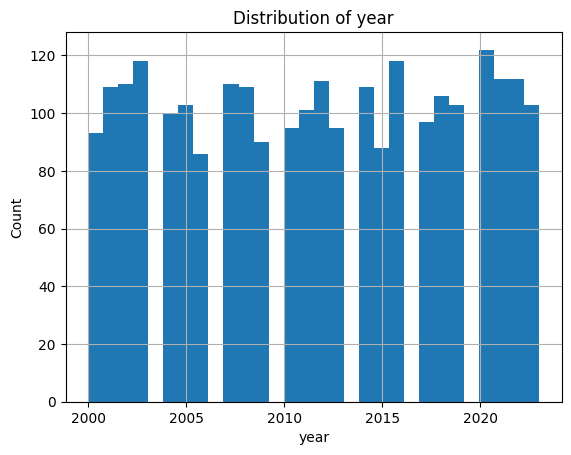

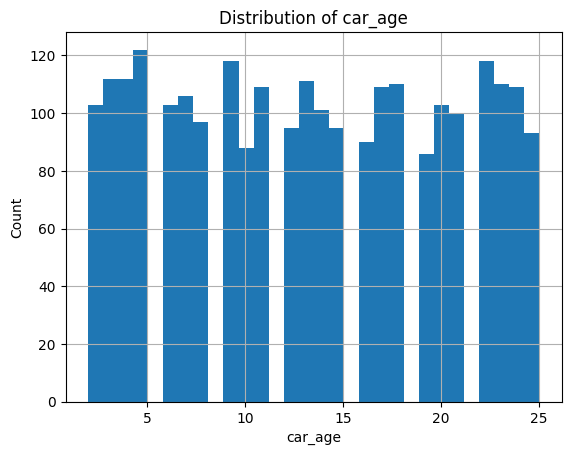

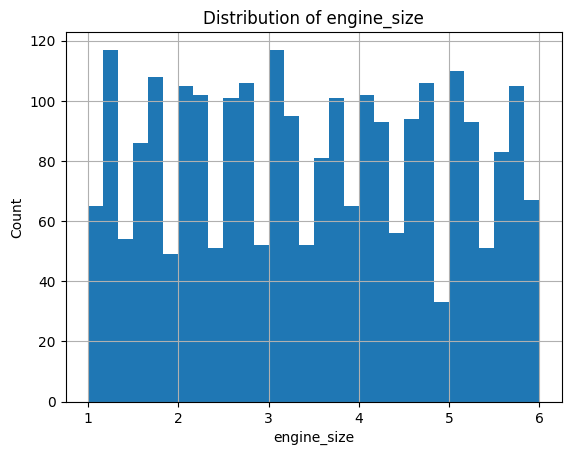

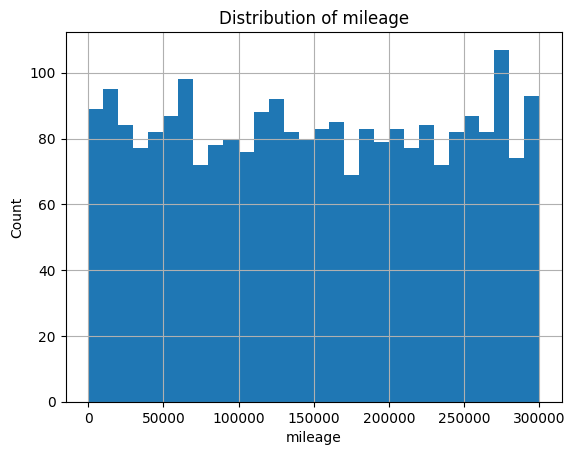


--- Value counts for year_cat ---
year_cat
00s        1030
2015-19     546
2010-14     504
2020+       327
90s-00       93
Name: count, dtype: int64

--- Value counts for mileage_cat ---
mileage_cat
high         1240
very_low      427
medium        418
low           415
very_high       0
Name: count, dtype: int64

--- Value counts for engine_size_cat ---
engine_size_cat
large         642
mid           620
very_large    598
very_small    322
small         318
Name: count, dtype: int64

--- Value counts for brand ---
brand
toyota      374
audi        368
bmw         358
mercedes    353
honda       352
tesla       348
ford        347
Name: count, dtype: int64

--- Value counts for fuel_type ---
fuel_type
diesel      655
petrol      630
electric    614
hybrid      601
Name: count, dtype: int64

--- Value counts for transmission ---
transmission
manual       1308
automatic    1192
Name: count, dtype: int64

--- Value counts for condition ---
condition
used        855
like new    836
new   

count     2500.000000
mean     52638.022532
std      27295.833455
min       5011.270000
25%      28908.485000
50%      53485.240000
75%      75838.532500
max      99982.590000
Name: price, dtype: float64

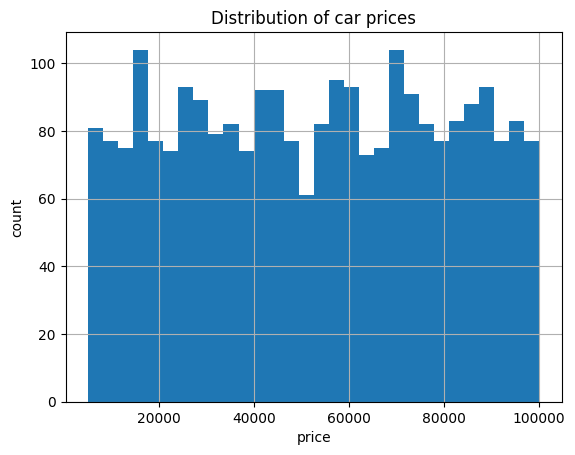

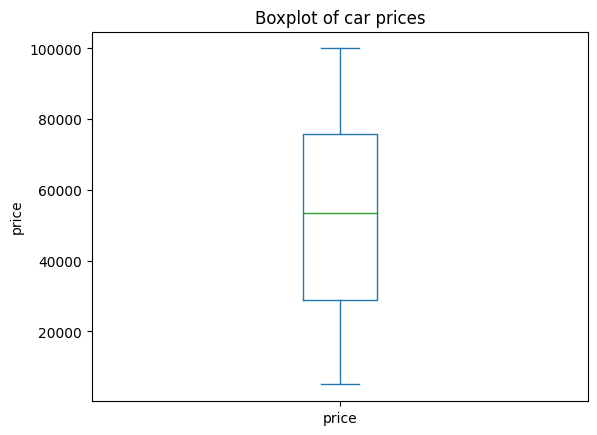


--- price_cat counts ---
price_cat
luxury          1051
premium          540
mid              514
budget           395
ultra_luxury       0
Name: count, dtype: int64

--- price_cat percentages (%) ---
price_cat
luxury          42.04
premium         21.60
mid             20.56
budget          15.80
ultra_luxury     0.00
Name: proportion, dtype: float64

--- SVM dataset shape ---
(2500, 11)

--- Target distribution for SVM (price_cat) ---
price_cat
luxury     1051
premium     540
mid         514
budget      395
Name: count, dtype: int64

Numeric columns used in SVM: ['year', 'car_age', 'engine_size', 'mileage']
Categorical columns used in SVM: ['brand', 'fuel_type', 'transmission', 'condition', 'year_cat', 'mileage_cat', 'engine_size_cat']

Train size: (2000, 11)
Test size: (500, 11)

SVM Accuracy: 0.3080

--- Classification Report ---

--- Confusion Matrix ---
[[23 21 14 21]
 [41 76 36 57]
 [24 31 26 22]
 [25 34 20 29]]


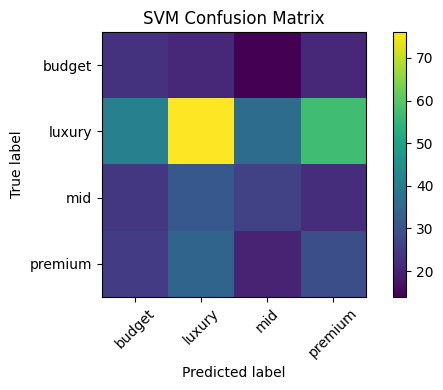

In [1]:


import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import os

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


csv_files = glob.glob("/kaggle/input/**/*.csv", recursive=True)

if csv_files:
    FILE_PATH = csv_files[0]
else:
    FILE_PATH = "car_price_prediction_.csv"
    if not os.path.exists(FILE_PATH):
        raise FileNotFoundError(
            "No CSV files found under /kaggle/input and 'car_price_prediction_.csv' not found locally."
        )

print("Using file:", FILE_PATH)
df = pd.read_csv(FILE_PATH)

# Normalize column names

df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

# Basic info + missing values

print("\n--- DataFrame info ---")
print(df.info())

print("\n--- Missing values per column ---")
print(df.isna().sum())

# Clean categorical columns
for col in ['brand', 'fuel_type', 'transmission', 'condition', 'model']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower().replace({'nan': None})


# Drop duplicates and ID column if present

if df.duplicated().sum() > 0:
    df = df.drop_duplicates()

if 'car_id' in df.columns:
    df = df.drop(columns=['car_id'])

# Ensure numeric types for main numeric attributes
for col in ['year', 'mileage', 'price', 'engine_size']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\n--- NaNs in main numeric columns ---")
print(df[['year', 'mileage', 'price', 'engine_size']].isna().sum())

# Feature engineering

CURRENT_YEAR = datetime.now().year

if 'year' in df.columns:
    df['car_age'] = CURRENT_YEAR - df['year']

if 'year' in df.columns:
    df['year_cat'] = pd.cut(
        df['year'].dropna(),
        bins=[1990, 2000, 2010, 2015, 2020, 2030],
        labels=['90s-00', '00s', '2010-14', '2015-19', '2020+']
    )
    df['year_cat'] = df['year_cat'].reindex(df.index)

if 'mileage' in df.columns:
    df.loc[df['mileage'] < 0, 'mileage'] = np.nan
    df['mileage_cat'] = pd.cut(
        df['mileage'],
        bins=[-1, 50000, 100000, 150000, 300000, np.inf],
        labels=['very_low', 'low', 'medium', 'high', 'very_high']
    )

if 'price' in df.columns:
    df['price_cat'] = pd.cut(
        df['price'],
        bins=[-1, 20000, 40000, 60000, 100000, np.inf],
        labels=['budget', 'mid', 'premium', 'luxury', 'ultra_luxury']
    )

if 'engine_size' in df.columns:
    df['engine_size_cat'] = pd.cut(
        df['engine_size'],
        bins=[-1, 1.6, 2.2, 3.4, 4.7, np.inf],
        labels=['very_small', 'small', 'mid', 'large', 'very_large']
    )

print("\n--- Data after feature engineering ---")
print(df.info())
display(df.head())


# INPUT ATTRIBUTE ANALYSIS (X)

num_input_cols = [c for c in ['year', 'car_age', 'engine_size', 'mileage'] if c in df.columns]

if num_input_cols:
    print("\n--- Numerical input attributes summary ---")
    display(df[num_input_cols].describe().T)

    for col in num_input_cols:
        plt.figure()
        df[col].dropna().hist(bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

for col in ['year_cat', 'mileage_cat', 'engine_size_cat', 'brand', 'fuel_type', 'transmission', 'condition']:
    if col in df.columns:
        print(f"\n--- Value counts for {col} ---")
        print(df[col].value_counts(dropna=False))

#OUTPUT ATTRIBUTE ANALYSIS (y = price, price_cat)

if 'price' in df.columns:
    print("\n--- Numerical target (price) summary ---")
    display(df['price'].describe())

    plt.figure()
    df['price'].dropna().hist(bins=30)
    plt.title("Distribution of car prices")
    plt.xlabel("price")
    plt.ylabel("count")
    plt.show()

    plt.figure()
    df['price'].dropna().plot(kind='box')
    plt.title("Boxplot of car prices")
    plt.ylabel("price")
    plt.show()

if 'price_cat' in df.columns:
    print("\n--- price_cat counts ---")
    print(df['price_cat'].value_counts(dropna=False))

    print("\n--- price_cat percentages (%) ---")
    print((df['price_cat'].value_counts(normalize=True, dropna=False) * 100).round(2))

# SVM MODEL – PRICE CATEGORY PREDICTION

# Prepare X and y

if 'price_cat' not in df.columns:
    raise ValueError("price_cat column is required for SVM classification but was not found.")

# Target
y = df['price_cat'].astype(str)

# Candidate features (numeric + categorical)
features = [
    'year', 'car_age', 'engine_size', 'mileage',    # numeric
    'brand', 'fuel_type', 'transmission', 'condition',
    'year_cat', 'mileage_cat', 'engine_size_cat'    # categorical / binned
]

# Keep only existing columns
features = [f for f in features if f in df.columns]

X = df[features].copy()

# Drop rows with missing values in any feature or target
svm_data = pd.concat([X, y], axis=1).dropna()
X = svm_data[features]
y = svm_data['price_cat'].astype(str)

print("\n--- SVM dataset shape ---")
print(X.shape)
print("\n--- Target distribution for SVM (price_cat) ---")
print(y.value_counts())

# Split numeric vs categorical
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric columns used in SVM:", numeric_cols)
print("Categorical columns used in SVM:", categorical_cols)

# Preprocessing + SVM Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

svm_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('svm', SVC(
        kernel='rbf',
        C=10.0,                
        gamma='scale',
        class_weight='balanced',
        random_state=42         
    ))
])


#  Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("\nTrain size:", X_train.shape)
print("Test size:", X_test.shape)


# Train SVM

svm_model.fit(X_train, y_train)


# Evaluate SVM

y_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nSVM Accuracy: {acc:.4f}")

print("\n--- Classification Report ---")
classification_report(y_test, y_pred, zero_division=0)


print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Simple confusion matrix visualization
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest')
plt.title("SVM Confusion Matrix")
plt.colorbar()
classes = sorted(y.unique())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()